In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [4]:
X.shape, Y.shape


((1000, 5), (1000,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
X_train.shape, Y_train.shape


((800, 5), (800,))

In [8]:
X_test.shape, Y_test.shape


((200, 5), (200,))

In [9]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [10]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [11]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [12]:
import pandas as pd
import seaborn as sns

In [13]:

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
11,Naive_Bayes,0.895
4,Gaussian_Process,0.890
8,Random_Forest,0.890
6,Decision_Tree,0.885
9,Neural_Net,0.885
1,Linear_SVM,0.880
12,QDA,0.880
7,Extra_Trees,0.865
5,Gradient_Boosting,0.860
0,Nearest_Neighbors,0.855


In [14]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
11,Naive_Bayes,0.895000
4,Gaussian_Process,0.890000
8,Random_Forest,0.890000
6,Decision_Tree,0.885000
9,Neural_Net,0.885000
1,Linear_SVM,0.880000
12,QDA,0.880000
7,Extra_Trees,0.865000
5,Gradient_Boosting,0.860000
0,Nearest_Neighbors,0.855000


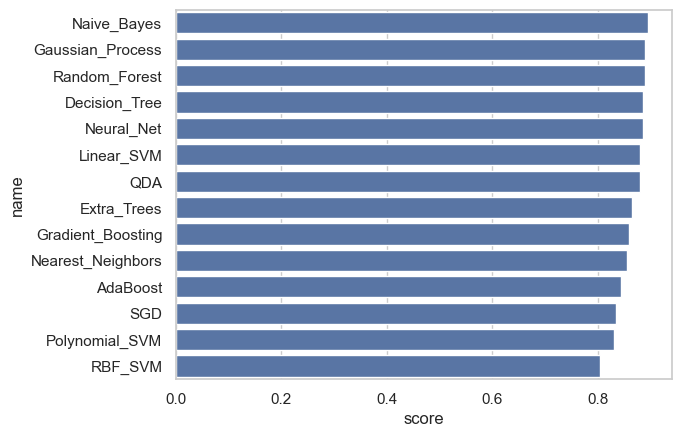

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [16]:
df = pd.read_csv("Advertising.csv")

In [17]:
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import ElasticNet


In [20]:
help(ElasticNet)


Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |
 |  Minimizes the objective function::
 |
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |
 |  where::
 |
 |          alpha = a + b and l1_ratio = a / (a + b)
 |
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to

In [21]:
base_elastic_model = ElasticNet()


In [22]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
# число verbose выбирайте сами
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [25]:
grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [26]:
grid_model.best_estimator_


ElasticNet(alpha=0.1, l1_ratio=1)

In [27]:
y_pred = grid_model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.387342642087474